In [18]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
#import matplotlib.style as style 
sns.set_style('darkgrid')

# adjusting display restrictions 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
# setting preference to remove scientific notation 
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

### Importing Functions From Helper Functions Folder ([ref link](https://www.geeksforgeeks.org/python-import-module-from-different-directory/))

In [1]:
# importing sys
import sys
  
# adding helper_func to the system path
sys.path.insert(0, '../helper_functions')
# importing actual functions
from helper_functions import character_df, fillna_centrl_tendcy, null_reminders, turkey_outliers, metric_reg

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../../Data/complete_fire.csv')

df.head()

unique_fire_identifier   lattitude  longitude  acres_burned fire_cause  \
0      2003-WYCMX-200237 -105.563067  44.603340    139.091837    Unknown   
1      2004-CABDU-006784 -117.076679  34.733894   1906.698008    Unknown   
2      2008-IDGBK-000002 -116.216680  43.666673    685.728842    Unknown   
3      2008-IDCTF-008902 -111.426912  42.096336     20.000000    Unknown   
4      2008-AZPNF-000975 -112.072414  34.598306     77.946287    Unknown   

       incident_name  IsFSAssisted   origin_county state  year  ...  \
0           SCHWARTZ           1.0        Campbell    WY  2003  ...   
1            MENTONE           1.0  San Bernardino    CA  2004  ...   
2  NIFC RAMP SUPPORT           1.0             Ada    ID  2008  ...   
3     St. Charles RX           0.0       Bear Lake    ID  2008  ...   
4   Mingus/Cherry Rx           0.0         Yavapai    AZ  2008  ...   

   area (acres)  population  d0  d1  d2  d3  d4  DSCI_avg  DSCI_summed  \
0           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
1           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
2           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
3           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   
4           NaN         NaN NaN NaN NaN NaN NaN       NaN          NaN   

   precipitation(in)  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 23 columns]

In [4]:
df_clean = df.dropna()
df_clean.isnull().sum()

unique_fire_identifier    0
lattitude                 0
longitude                 0
acres_burned              0
fire_cause                0
incident_name             0
IsFSAssisted              0
origin_county             0
state                     0
year                      0
month                     0
value                     0
anomaly                   0
area (acres)              0
population                0
d0                        0
d1                        0
d2                        0
d3                        0
d4                        0
DSCI_avg                  0
DSCI_summed               0
precipitation(in)         0
dtype: int64

In [6]:
df_clean.shape

(167273, 23)

In [8]:
df_clean['year'].value_counts(normalize=True)

2021    0.232363
2020    0.209472
2019    0.168646
2017    0.149636
2018    0.139897
2016    0.099986
Name: year, dtype: float64

In [119]:
# quick rename to easily plot precipitation 
df_clean.rename({'precipitation(in)':'precipitation'},inplace=True)

In [215]:
#sns.set(style="darkgrid")
#years = df_clean['year'].unique()
#for year in years:
#    yearly_df = df_clean[df_clean['year']==year]
#    sns.histplot(data=yearly_df, x="acres_burned", label="Label_name", kde=True)
#    plt.legend() 
 #   plt.show()
 #   break

In [4]:
years = df_clean['year'].unique()
years

array([2016, 2017, 2018, 2019, 2020, 2021])

In [5]:
cnt=0
hist_data = []
for year in years:
    list_a = list(df_clean[df_clean['year']==year]['acres_burned'])
    print('length of array',len(list_a[:]))
    hist_data.append(np.array(list_a, dtype=np.float32))
    print(len(hist_data) )

length of array 16725
1
length of array 25030
2
length of array 23401
3
length of array 28210
4
length of array 35039
5
length of array 38868
6


In [6]:
print(type(years))
print(len(years))

years

<class 'numpy.ndarray'>
6


array([2016, 2017, 2018, 2019, 2020, 2021])

In [7]:
years = list(years.astype('str'))


In [ ]:
#fig = ff.create_distplot(hist_data,group_labels = years)
#fig.show()

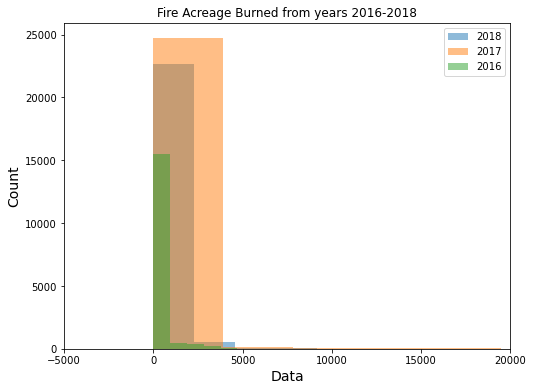

In [12]:
plt.figure(figsize=(8,6))
plt.hist(hist_data[2], bins=200, alpha=0.5, label="2018")
plt.hist(hist_data[1], bins=200, alpha=0.5, label="2017")
plt.hist(hist_data[0], bins=200, alpha=0.5, label="2016")

plt.xlim(-5_000,20_000)
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Fire Acreage Burned from years 2016-2018")
plt.legend(loc='upper right');
#plt.savefig("../Viz/overlapping_histograms_with_matplotlib_Python_2.png")

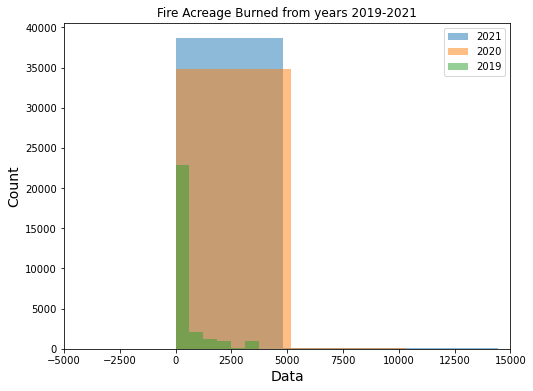

In [14]:
plt.figure(figsize=(8,6))
plt.hist(hist_data[5], bins=200, alpha=0.5, label="2021")
plt.hist(hist_data[4], bins=200, alpha=0.5, label="2020")
plt.hist(hist_data[3], bins=200, alpha=0.5, label="2019")

plt.xlim(-5_000,15_000)
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Fire Acreage Burned from years 2019-2021")
plt.legend(loc='upper right');
#plt.savefig("../Viz/overlapping_histograms_with_matplotlib_Python_2.png")

In [15]:
df_clean.head()

unique_fire_identifier   lattitude  longitude  acres_burned  \
34889      2016-IDBOD-000058 -116.330913  43.406206           0.1   
34890      2016-MNRLA-000184  -94.916910  48.017407           0.1   
34891      2016-MNRLA-000185  -95.015306  47.875908           0.1   
34892      2016-AZA5S-002056 -112.761608  34.201307           0.5   
34893      2016-AZNAA-000033 -108.537233  36.744172           0.5   

         fire_cause incident_name  IsFSAssisted origin_county state  year  \
34889         Human  SOUTH CLOVER           1.0           Ada    ID  2016   
34890  Undetermined        RL 130           0.0      Beltrami    MN  2016   
34891  Undetermined        RL 131           0.0      Beltrami    MN  2016   
34892  Undetermined       KRISTEE           0.0       Yavapai    AZ  2016   
34893         Human     HOGBACK 1           1.0      San Juan    NM  2016   

       ...  area (acres)  population         d0         d1        d2   d3  \
34889  ...    53487360.0   1684036.0   8.043333   0.000000  0.000000  0.0   
34890  ...    55643520.0   5525360.0   9.663333   1.026667  0.000000  0.0   
34891  ...    55643520.0   5525360.0   9.663333   1.026667  0.000000  0.0   
34892  ...    72963840.0   6944767.0  32.776667  65.580000  1.170000  0.0   
34893  ...    77819520.0   2092555.0  53.023333  43.686667  0.086667  0.0   

        d4    DSCI_avg  DSCI_summed  precipitation(in)  
34889  0.0    8.043333        24.13           0.040772  
34890  0.0   11.716667        35.15           0.040886  
34891  0.0   11.716667        35.15           0.040886  
34892  0.0  167.446667       502.34           0.031042  
34893  0.0  140.656667       421.97           0.235141  

[5 rows x 23 columns]

---
Summary Info

In [34]:
charac_append = list(df_clean.dtypes)

In [7]:
charac_clean = character_df(df_clean)
charac_clean

column_name  null_count  percent_missing  \
0   unique_fire_identifier           0             0.00   
1                lattitude           0             0.00   
2                longitude           0             0.00   
3             acres_burned           0             0.00   
4               fire_cause           0             0.00   
5            incident_name           0             0.00   
6             IsFSAssisted           0             0.00   
7            origin_county           0             0.00   
8                    state           0             0.00   
9                     year           0             0.00   
10                   month           0             0.00   
11                   value           0             0.00   
12                 anomaly           0             0.00   
13            area (acres)           0             0.00   
14              population           0             0.00   
15                      d0           0             0.00   
16                      d1           0             0.00   
17                      d2           0             0.00   
18                      d3           0             0.00   
19                      d4           0             0.00   
20                DSCI_avg           0             0.00   
21             DSCI_summed           0             0.00   
22       precipitation(in)           0             0.00   

                                   categorical_unique   dtypes  
0   [2016-IDBOD-000058, 2016-MNRLA-000184, 2016-MN...   object  
1                                            not cat.  float64  
2                                            not cat.  float64  
3                                            not cat.  float64  
4             [Human, Undetermined, Unknown, Natural]   object  
5   [SOUTH CLOVER, RL 130, RL 131, KRISTEE, HOGBAC...   object  
6                                            not cat.  float64  
7   [Ada, Beltrami, Yavapai, San Juan, Rolette, Ma...   object  
8   [ID, MN, AZ, NM, ND, CA, SD, OK, ME, NV, FL, V...   object  
9                                            not cat.    int64  
10                                           not cat.    int64  
11                                           not cat.  float64  
12                                           not cat.  float64  
13                                           not cat.  float64  
14                                           not cat.  float64  
15                                           not cat.  float64  
16                                           not cat.  float64  
17                                           not cat.  float64  
18                                           not cat.  float64  
19                                           not cat.  float64  
20                                           not cat.  float64  
21                                           not cat.  float64  
22                                           not cat.  float64

In [41]:
# looking at which columns contain lower bound outliers (low and high)columns that dont have outliers will not be displayed
lwr_out_df, upper_out_df = turkey_outliers(df_clean)
lwr_out_df # only indexes displayed 

column_name  lwr_min_outlr_indx
0           lattitude              188841
1           longitude               82323
2        acres_burned               35445
3        IsFSAssisted               34890
4                year               34889
5        area (acres)               54014
6          population              131030
7                  d0               34958
8                  d1               34889
9                  d2               34889
10                 d3               34889
11           DSCI_avg               34958
12        DSCI_summed               34958
13  precipitation(in)              161430

In [42]:
# looking at which columns contain higher bound outliers columns that dont have outliers will not be displayed
upper_out_df # only indexes displayed 

column_name  upr_max_outlr_index
0           lattitude               179581
1        acres_burned               155412
2               month                51997
3             anomaly               166796
4        area (acres)                35002
5                  d0                41116
6                  d1                77040
7                  d2                78793
8                  d3               172525
9                  d4               165359
10           DSCI_avg               172525
11        DSCI_summed               158223
12  precipitation(in)                70646

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


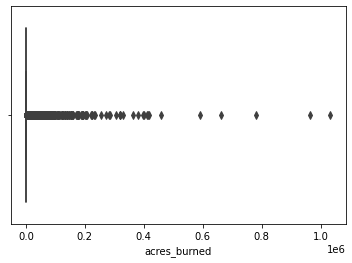

In [52]:
sns.boxplot(df_clean['acres_burned']); 

---
Setting fire classes based on acres_burned (standardized classes from 

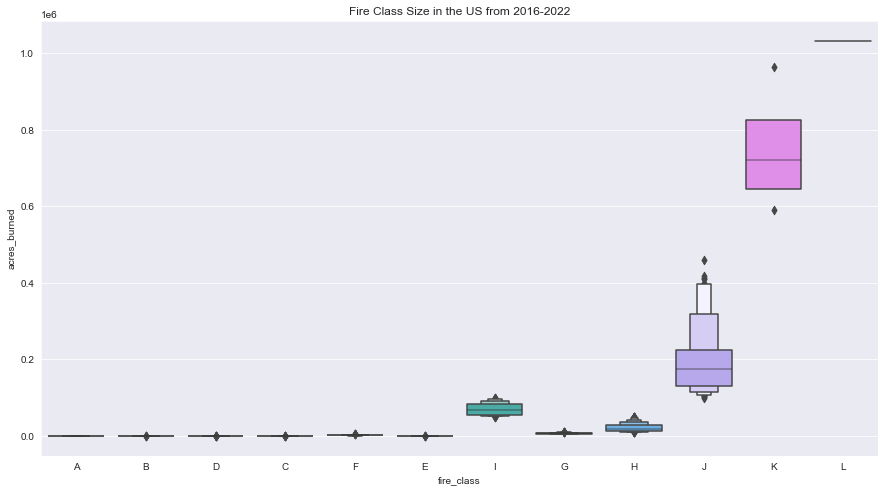

In [20]:
fire_class = []
for obs in df_clean['acres_burned']:
    if 0<=obs <= 0.26:
        fire_class.append('A')
    elif 0.26 <= obs <10.0:
        fire_class.append('B')
    elif 10.0<=obs<100.0:
        fire_class.append('C')
    elif 100.0<=obs<300:
        fire_class.append('D')
    elif 300.0 <= obs <1_000:
        fire_class.append('E')
    elif 1_000.0<=obs<5000.0:
        fire_class.append('F')
    elif 5000.0 <= obs <10_000:
        fire_class.append('G')
    elif 10_000.0 <=obs<50_000:
        fire_class.append('H')
    elif 50_000.0<=obs<100_000:
        fire_class.append('I')
    elif 100_000.0<=obs<500000.0:
        fire_class.append('J')
    elif 500000.0 <= obs <1_000_000:
        fire_class.append('K')
    elif obs >= 1_000_000.0:
        fire_class.append('L')
    else:
        print(obs)
df_clean['fire_class'] = fire_class 


plt.figure(figsize=(15,8))
sns.boxenplot(y=df_clean['acres_burned'],x = df_clean['fire_class']);
plt.title('Fire Class Size in the US from 2016-2022')
plt.show();

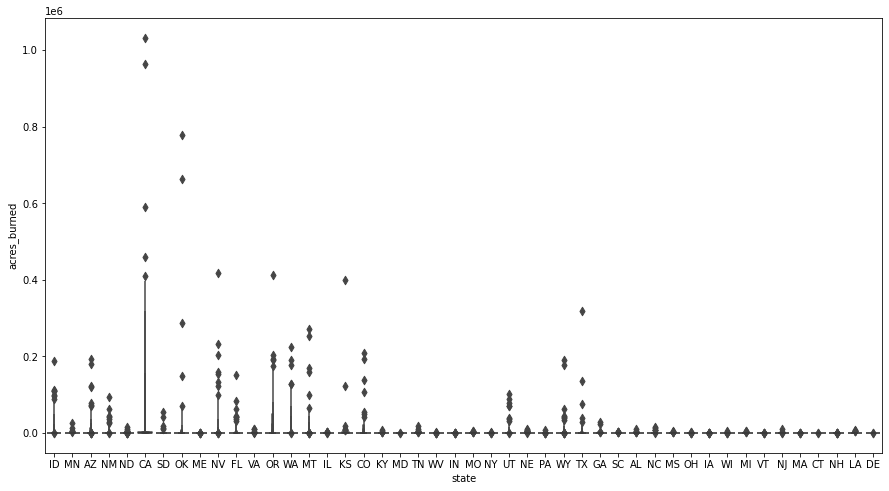

In [77]:
plt.figure(figsize=(15,8))
sns.boxenplot(y=df_clean['acres_burned'],x = df_clean['state']);


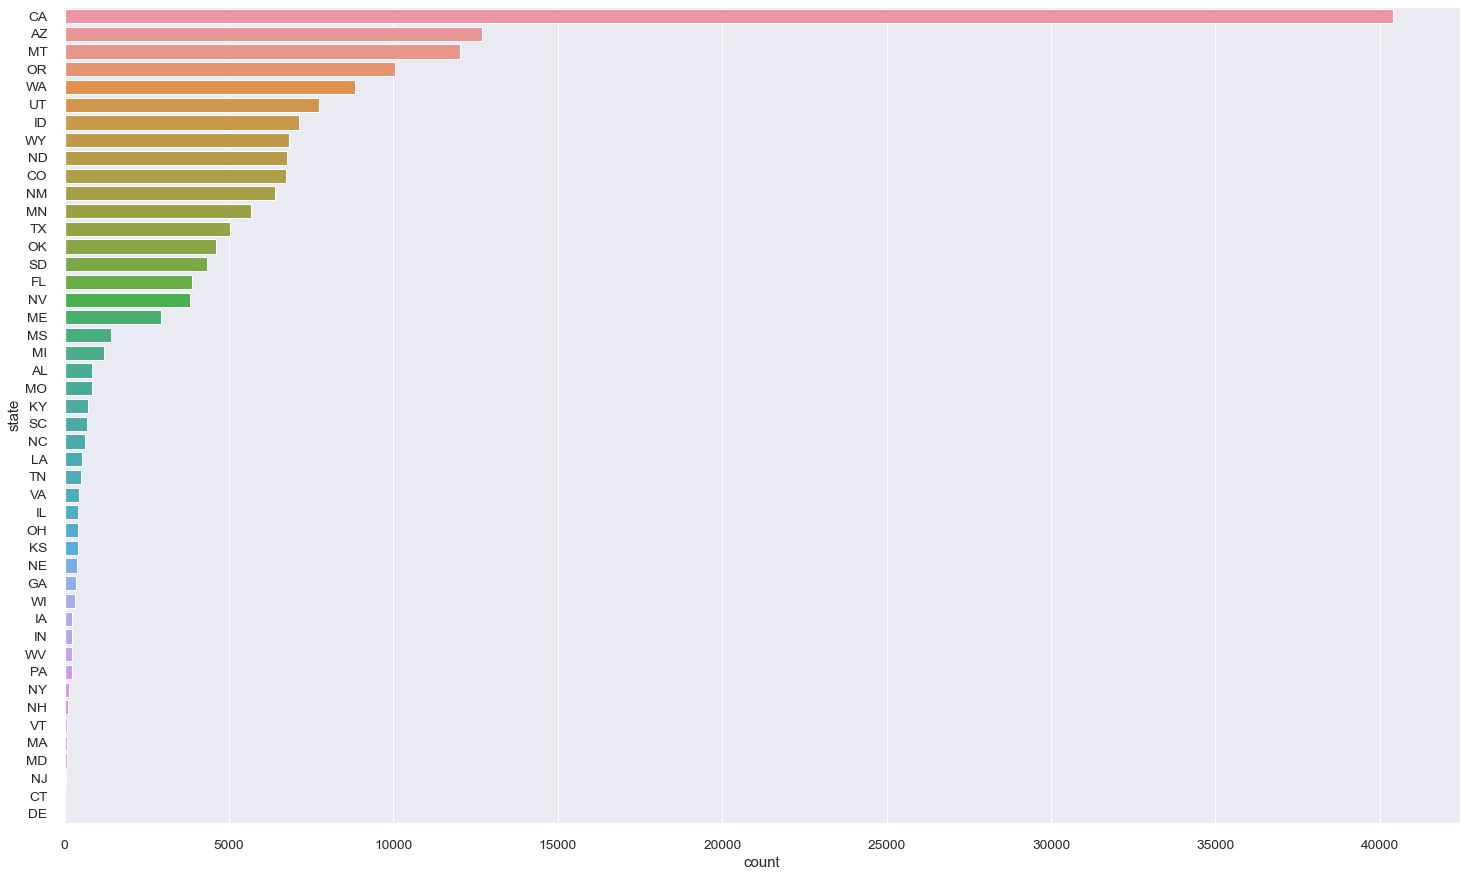

In [127]:
plt.figure(figsize = (25,15))

sns.countplot(y = 'state',
              data = df_clean,
              order = df_clean['state'].value_counts().index)
plt.show()

In [ ]:
## violin plots
b = sns.violinplot(y = "Draughts", data = df)


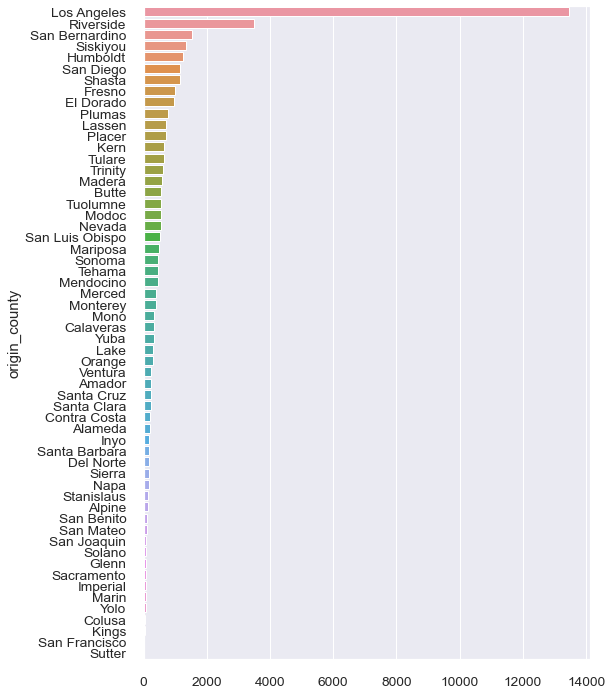

In [118]:
plt.figure(figsize = (8,12))
result =df_clean.groupby(["state"])['origin_county'].value_counts(ascending=False)
sns.set(font_scale = 1.25)

b = sns.barplot(y=result['CA'].index, x=result['CA'].values);

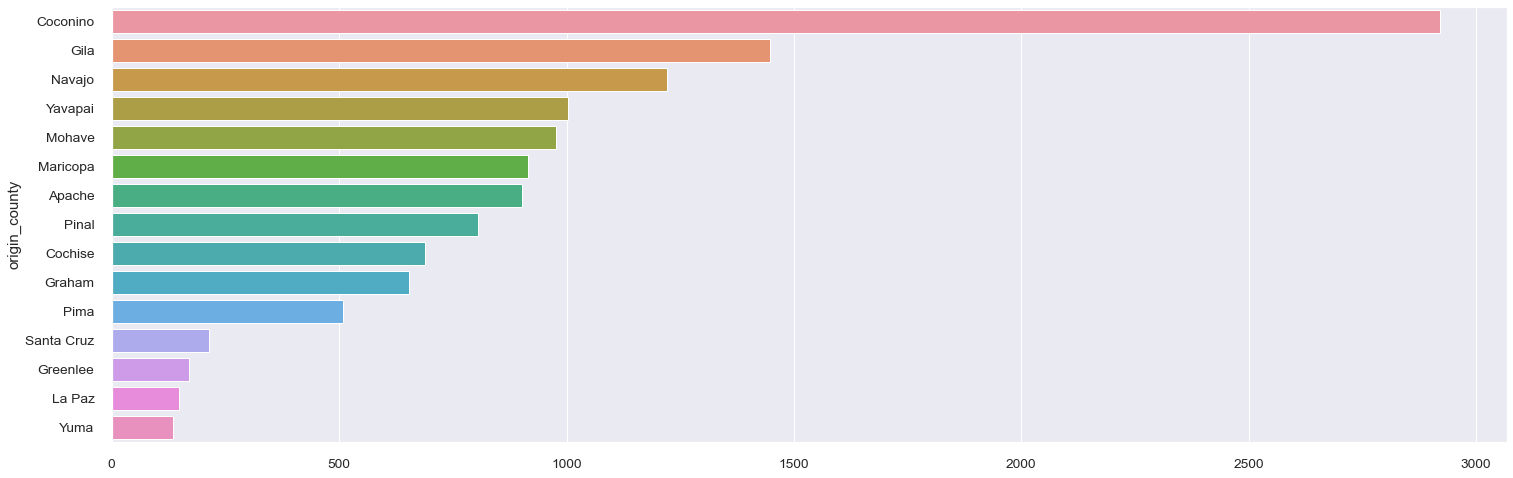

In [98]:
plt.figure(figsize = (25,8))
result =df_clean.groupby(["state"])['origin_county'].value_counts(ascending=False)
sns.set(font_scale = 1.25)

b = sns.barplot(y=result['AZ'].index, x=result['AZ'].values);

Sort Precipitation by mean([ref](https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering)) per State:

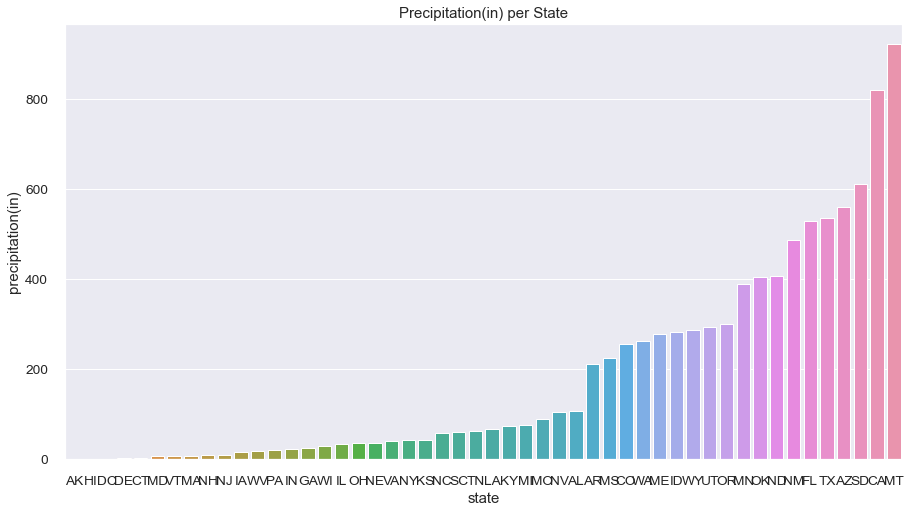

In [107]:
plt.figure(figsize=(15,8))
result = df.groupby(["state"])['precipitation(in)'].aggregate(np.sum).reset_index().sort_values('precipitation(in)')
sns.barplot(y='precipitation(in)',
            x="state", 
            data=result, 
            order=result['state'])
plt.title('Precipitation(in) per State')
plt.show();

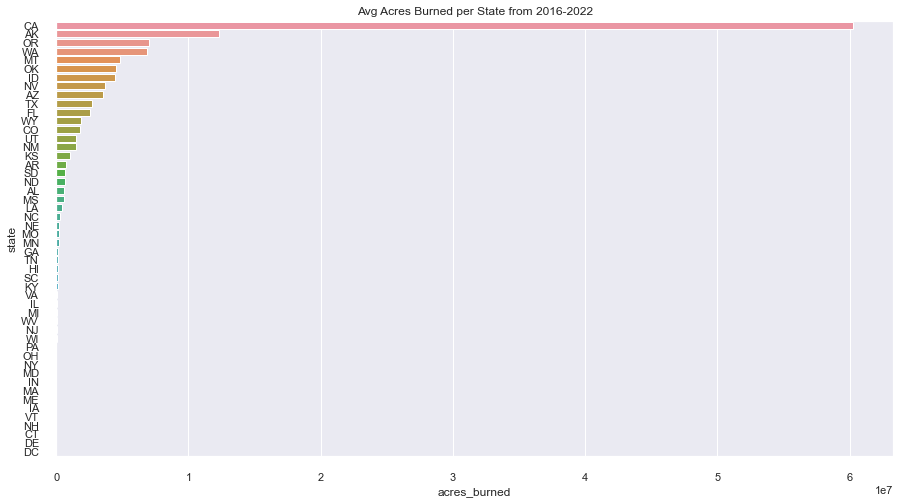

In [113]:
plt.figure(figsize=(15,8))
result = df.groupby(["state"])['acres_burned'].aggregate(np.sum).reset_index().sort_values('acres_burned',ascending=False)

sns.set(font_scale = 1)

sns.barplot(x='acres_burned', y='state', data=result, order=result['state'])
plt.title('Avg Acres Burned per State from 2016-2022')
plt.show();

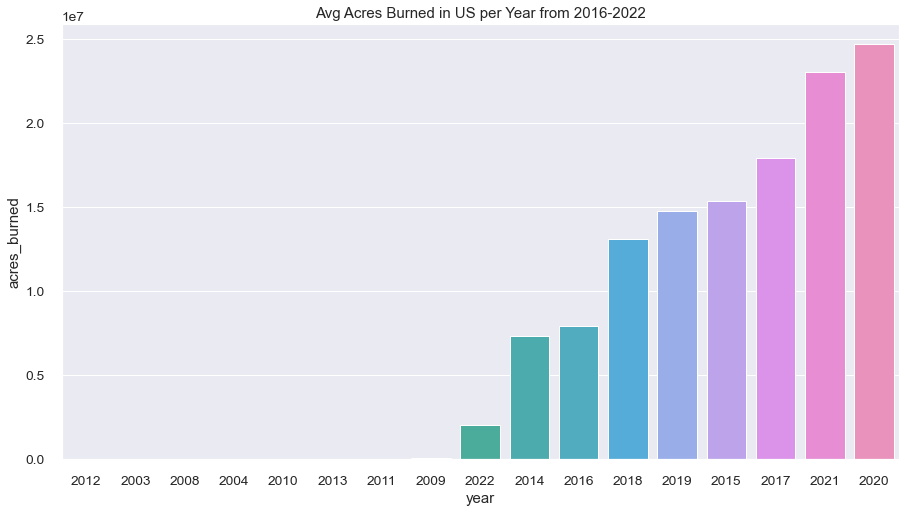

In [124]:
plt.figure(figsize=(15,8))
result = df.groupby(["year"])['acres_burned'].aggregate(np.sum).reset_index().sort_values('acres_burned')


sns.barplot(y='acres_burned', x='year', data=result, order=result['year'])
plt.title('Avg Acres Burned in US per Year from 2016-2022')
plt.show();

In [116]:
result = df.groupby(["origin_county"])['acres_burned'].aggregate(np.sum).reset_index().sort_values('acres_burned')
result = result[:51]

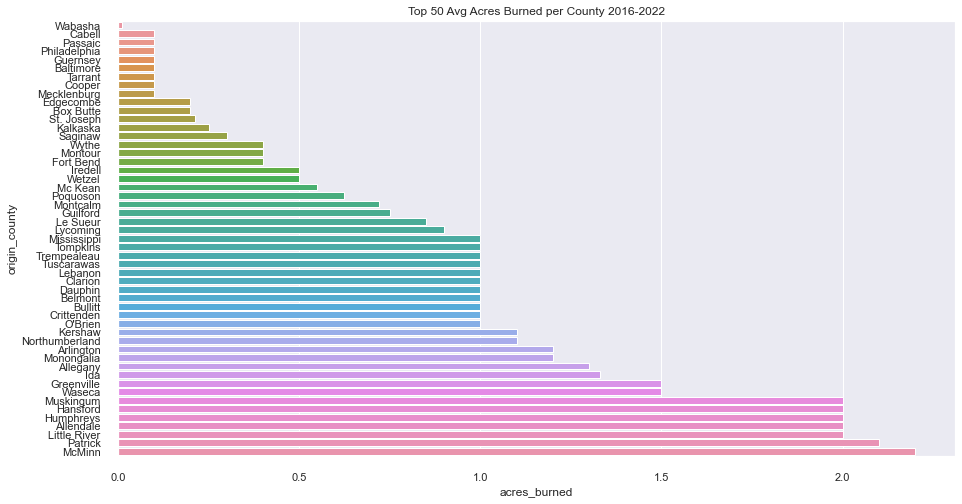

In [117]:
plt.figure(figsize=(15,8))
sns.barplot(x='acres_burned', y='origin_county', data=result, order=result['origin_county'])
plt.title('Top 50 Avg Acres Burned per County 2016-2022')
plt.show();

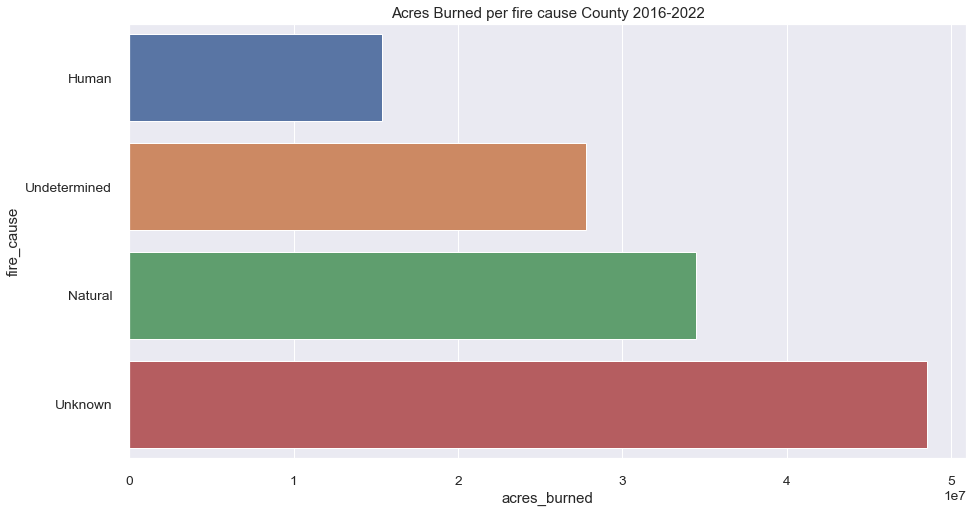

In [126]:
result = df.groupby(["fire_cause"])['acres_burned'].aggregate(np.sum).reset_index().sort_values('acres_burned')
plt.figure(figsize=(15,8))
sns.barplot(x='acres_burned', y='fire_cause', data=result, order=result['fire_cause'])
plt.title('Acres Burned per fire cause County 2016-2022')
plt.show();

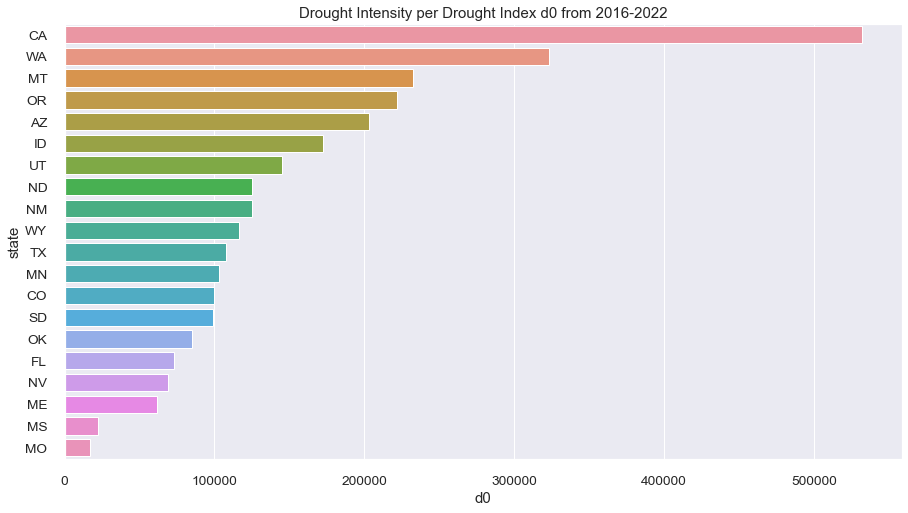

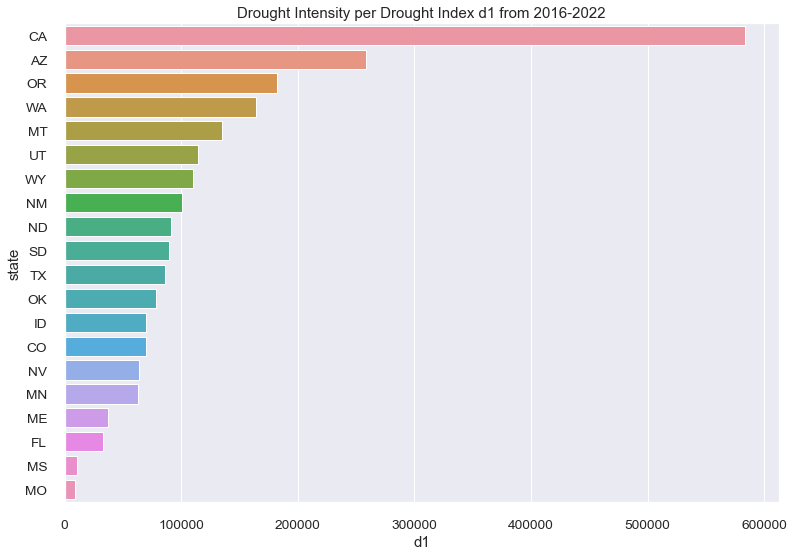

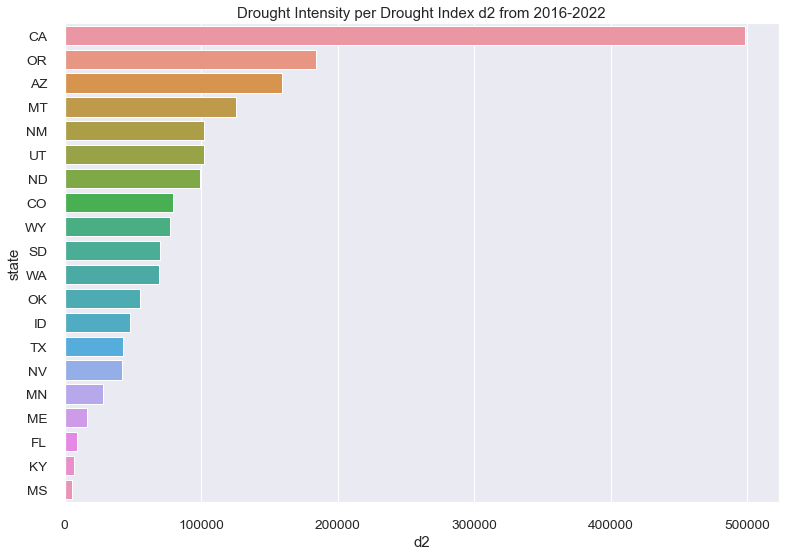

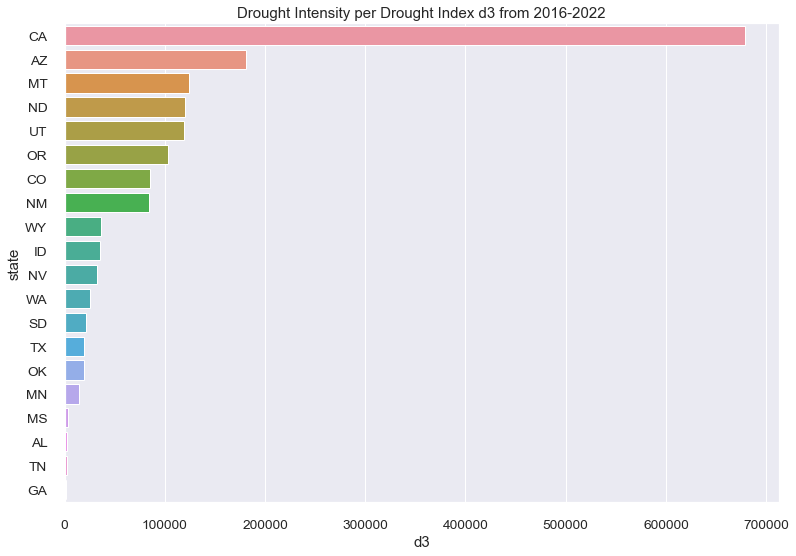

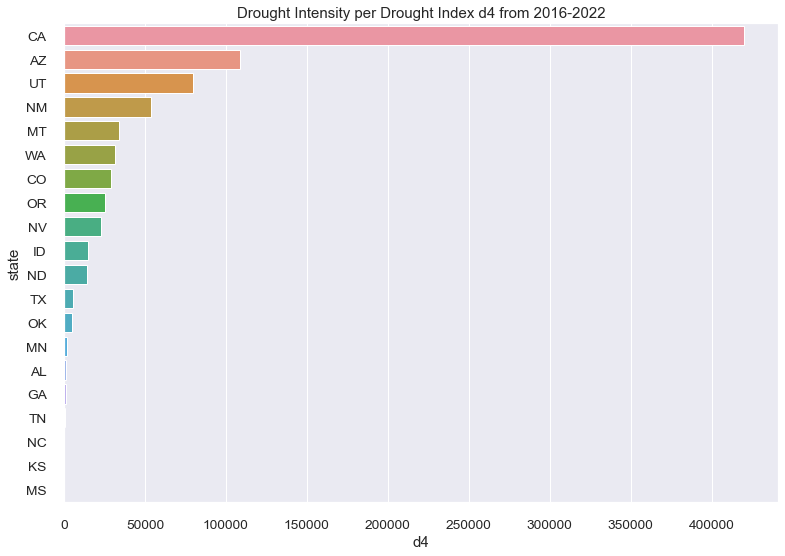

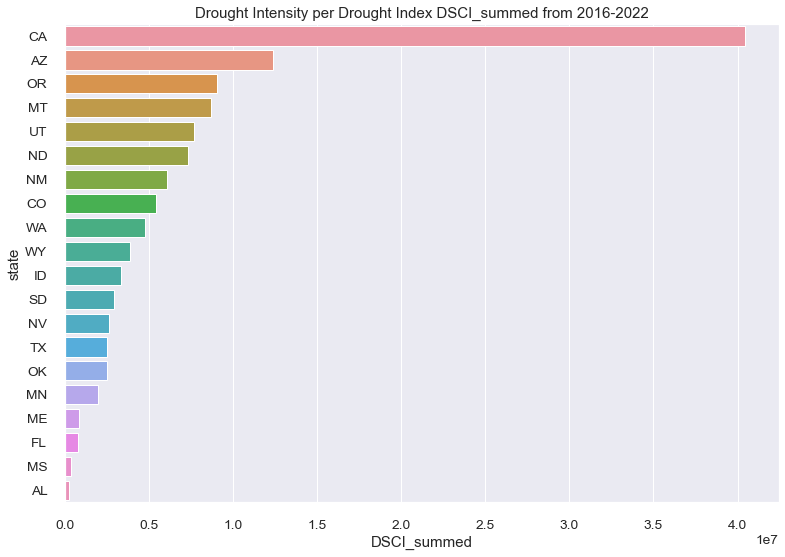

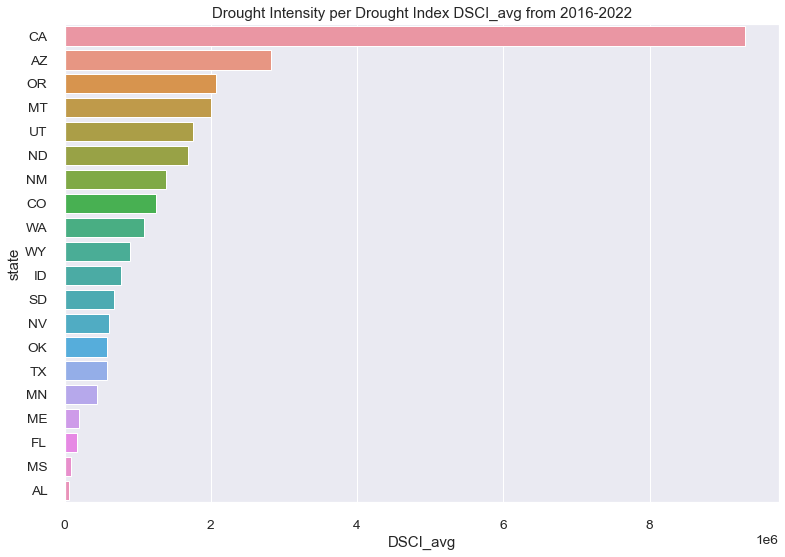

In [137]:
drought_index = ['d0','d1','d2','d3','d4','DSCI_summed','DSCI_avg']
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.25)

for column in drought_index:
    result = df_clean.groupby(["state"])[column].aggregate(np.sum).reset_index().sort_values(column,ascending=False)
    result = result[:20]
    sns.barplot(x=column, y='state', data=result, order=result['state'])
    plt.title(f'Drought Intensity per Drought Index {column} from 2016-2022')
    plt.show();


In [244]:
#result=pd.DataFrame(df_clean.groupby(["year","state"],as_index=False)['DSCI_summed'].aggregate(np.sum))
#print(result.columns)
#sns.swarmplot(x='state', y='year', data=df_clean, hue='DSCI_summed', dodge=True)

In [245]:
#result=pd.DataFrame(df_clean.groupby(["year","state"])['DSCI_summed'].aggregate(np.sum))
#sns.barplot(x='DSCI_summed', y='year', data=result,hue='state');

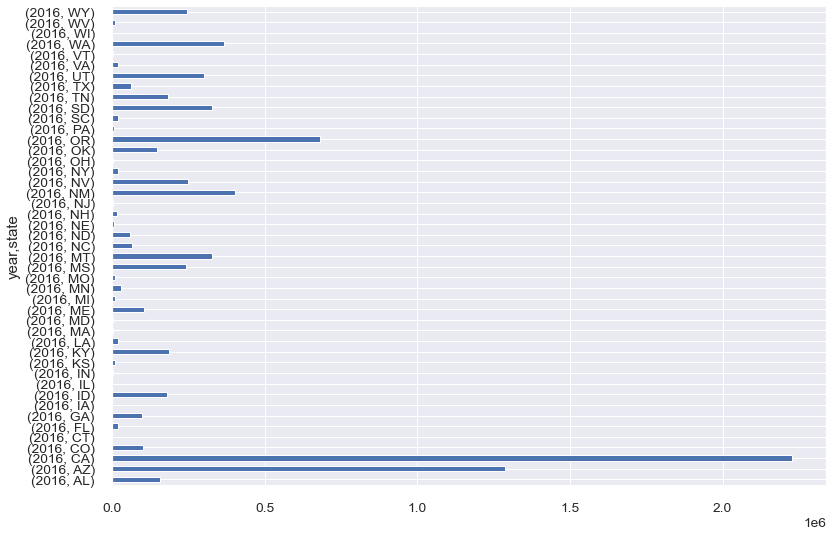

In [185]:
result=df_clean.groupby(["year","state"])['DSCI_summed'].aggregate(np.sum)
result[0:45].plot(kind='barh');

In [37]:
df_over8 = df_clean

---
Data Distributions

In [57]:

df_over500k=df_clean[(df_clean['fire_class']=="J")|(df_clean['fire_class']=="K")|(df_clean['fire_class']=="L")]
print(df_over500k.shape)
df_over500k.head()

(83, 24)


unique_fire_identifier  lattitude  longitude  acres_burned  \
41322      2016-NVNNS-010080    -116.92      41.02    122,292.00   
43314      2016-IDBOF-000539    -115.76      43.95    188,404.00   
43866      2016-CABEU-003422    -121.90      36.46    132,127.00   
45080      2016-WASPD-000344    -120.20      46.60    176,600.00   
53899      2017-OKOKS-170025    -100.13      36.86    150,000.00   

         fire_cause  incident_name  IsFSAssisted origin_county state  year  \
41322       Natural        Hot Pot          1.00          Elko    NV  2016   
43314  Undetermined        PIONEER          1.00         Boise    ID  2016   
43866         Human      SOBERANES          1.00      Monterey    CA  2016   
45080         Human       RANGE 12          1.00        Yakima    WA  2016   
53899  Undetermined  Starbuck Fire          0.00        Beaver    OK  2017   

       month  value  anomaly   area (acres)    population    d0    d1    d2  \
41322      7  73.70     1.60  70,762,880.00  2,919,555.00 32.97 12.57 21.42   
43314      7  64.80    -0.30  53,487,360.00  1,684,036.00 58.81  0.32  0.00   
43866      7  76.80     2.10 104,772,480.00 39,149,186.00 16.41 24.57 16.21   
45080      7  63.60    -0.50  45,633,920.00  7,299,961.00 96.37  3.63  0.00   
53899      3  56.20     6.90  44,737,920.00  3,933,602.00 14.71 35.27 38.32   

         d3    d4  DSCI_avg  DSCI_summed  precipitation(in) fire_class  
41322  0.26  0.00    124.71       498.84               0.02          J  
43314  0.00  0.00     59.44       237.76               0.04          J  
43866 21.76 21.04    310.02     1,240.08               0.00          J  
45080  0.00  0.00    103.63       414.52               0.03          J  
53899  3.12  0.00    228.35       913.41               0.11          J

In [38]:
df_over8 = df_over8[['lattitude','longitude','acres_burned','fire_class','state']].reset_index()

df_over8.head()

index  lattitude  longitude  acres_burned fire_class state
0  34889    -116.33      43.41          0.10          A    ID
1  34890     -94.92      48.02          0.10          A    MN
2  34891     -95.02      47.88          0.10          A    MN
3  34892    -112.76      34.20          0.50          B    AZ
4  34893    -108.54      36.74          0.50          B    NM

In [52]:

df_over8 =df_over8[df_over8['state']=='CA']

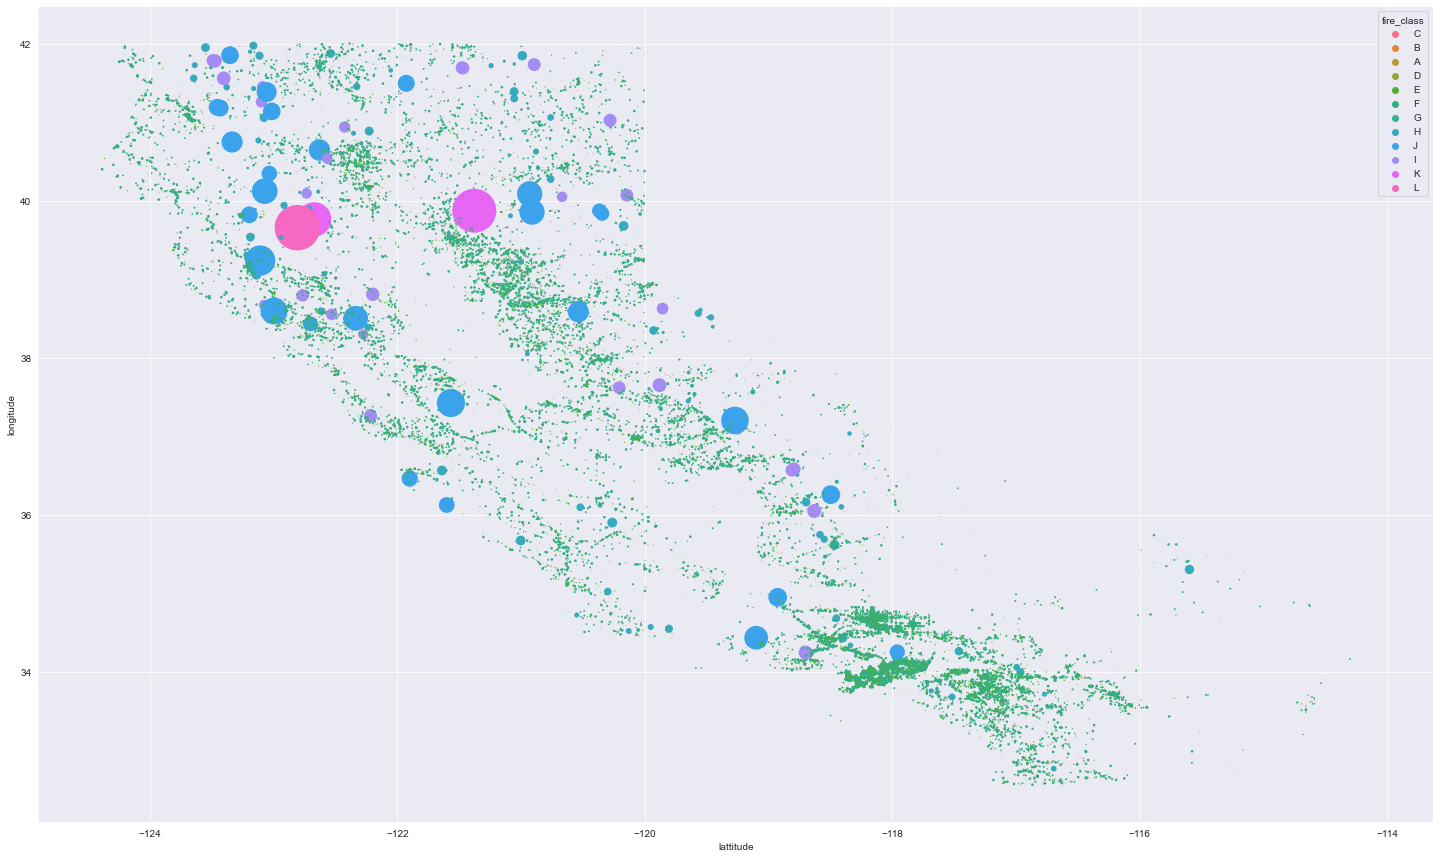

In [54]:
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude',y='longitude',hue='fire_class',data = df_over8,s=df_over8['acres_burned']/500,edgecolor=None);

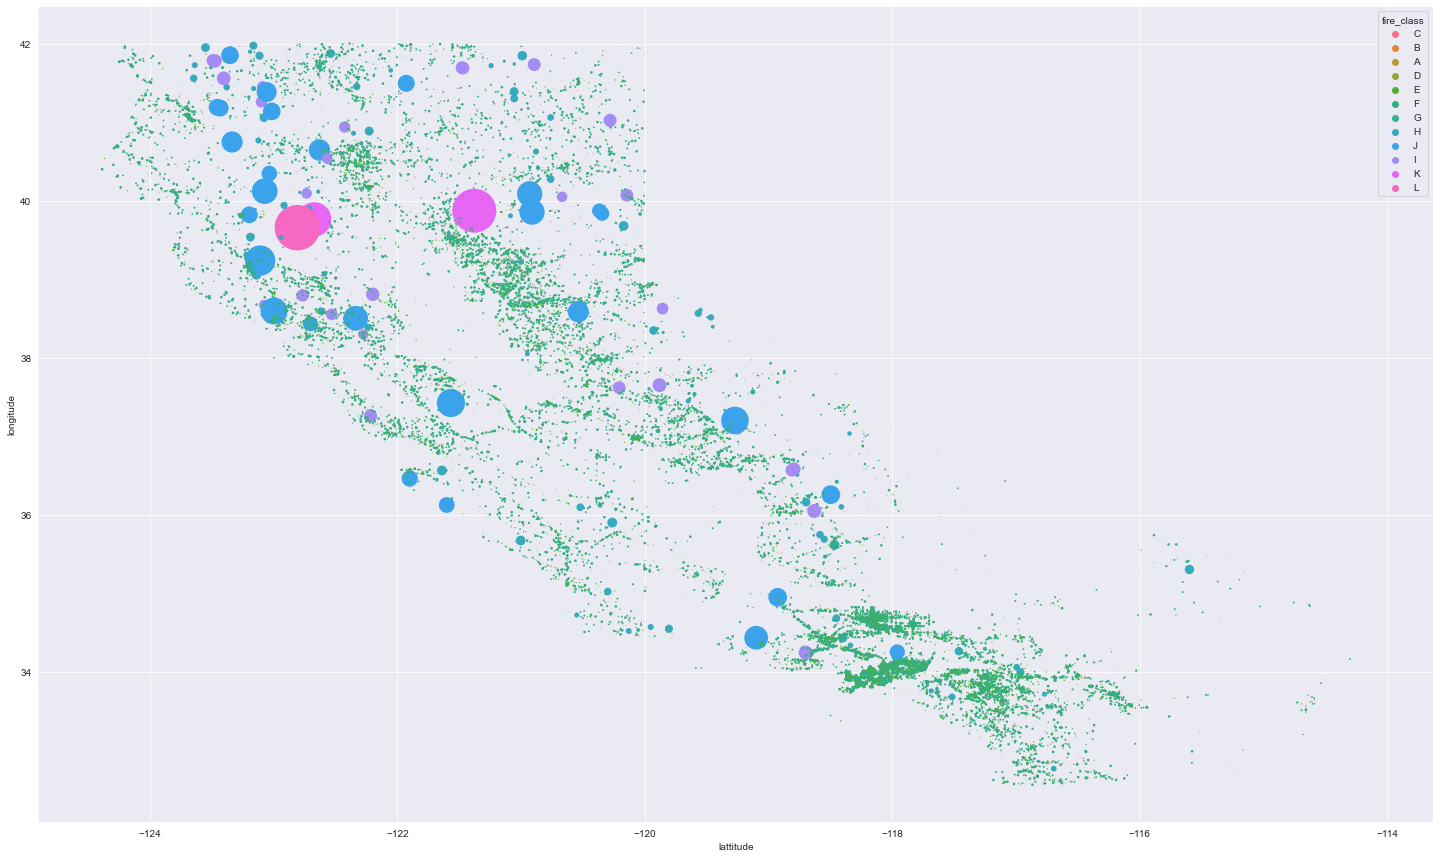

In [62]:
df_over8 =df_over8[df_over8['state']=='CA']
plt.figure(figsize=(25,15))
sns.scatterplot(x='lattitude',y='longitude',hue='fire_class',data = df_over8,s=df_over8['acres_burned']/500,edgecolor=None);

In [ ]:
drought_index = ['d0','d1','d2','d3','d4','DSCI_summed','DSCI_avg']
years = 
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.25)

for column in drought_index:
    
    result = df_clean.groupby(["state"])[column].aggregate(np.sum).reset_index().sort_values(column,ascending=False)
    result = result[:20]
    sns.barplot(x=column, y='state', data=result, order=result['state'])
    plt.title(f'Drought Intensity per Drought Index {column} from 2016-2022')
    plt.show();


In [13]:

#
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']
numdf = df_clean.copy().select_dtypes(include=numerics)
catdf = df_clean.copy().select_dtypes(include=categorical)
catdf.drop(columns=['unique_fire_identifier','incident_name'],inplace=True)
catdf.head()

fire_cause origin_county state
34889         Human           Ada    ID
34890  Undetermined      Beltrami    MN
34891  Undetermined      Beltrami    MN
34892  Undetermined       Yavapai    AZ
34893         Human      San Juan    NM

In [6]:
# will dummify these features to obtain correlations  
dummified_1 = pd.get_dummies(data=catdf,drop_first=False) 
dummified_1 = pd.concat([numdf,dummified_1],axis=1)
dummified_1.head()

lattitude  longitude  acres_burned  IsFSAssisted  year  month  value  \
34889    -116.33      43.41          0.10          1.00  2016      4  47.00   
34890     -94.92      48.02          0.10          0.00  2016      4  42.50   
34891     -95.02      47.88          0.10          0.00  2016      4  42.50   
34892    -112.76      34.20          0.50          0.00  2016      4  58.50   
34893    -108.54      36.74          0.50          1.00  2016      4  52.30   

       anomaly  area (acres)   population    d0    d1   d2   d3   d4  \
34889     6.00 53,487,360.00 1,684,036.00  8.04  0.00 0.00 0.00 0.00   
34890     1.20 55,643,520.00 5,525,360.00  9.66  1.03 0.00 0.00 0.00   
34891     1.20 55,643,520.00 5,525,360.00  9.66  1.03 0.00 0.00 0.00   
34892     1.80 72,963,840.00 6,944,767.00 32.78 65.58 1.17 0.00 0.00   
34893     0.90 77,819,520.00 2,092,555.00 53.02 43.69 0.09 0.00 0.00   

       DSCI_avg  DSCI_summed  precipitation(in)  fire_cause_Human  \
34889      8.04        24.13               0.04                 1   
34890     11.72        35.15               0.04                 0   
34891     11.72        35.15               0.04                 0   
34892    167.45       502.34               0.03                 0   
34893    140.66       421.97               0.24                 1   

       fire_cause_Natural  fire_cause_Undetermined  fire_cause_Unknown  \
34889                   0                        0                   0   
34890                   0                        1                   0   
34891                   0                        1                   0   
34892                   0                        1                   0   
34893                   0                        0                   0   

       origin_county_Abbeville  origin_county_Ada  origin_county_Adair  \
34889                        0                  1                    0   
34890                        0                  0                    0   
34891                        0                  0                    0   
34892                        0                  0                    0   
34893                        0                  0                    0   

       origin_county_Adams  origin_county_Addison  origin_county_Aiken  \
34889                    0                      0                    0   
34890                    0                      0                    0   
34891                    0                      0                    0   
34892                    0                      0                    0   
34893                    0                      0                    0   

       origin_county_Aitkin  origin_county_Alachua  origin_county_Alameda  \
34889                     0                      0                      0   
34890                     0                      0                      0   
34891                     0                      0                      0   
34892                     0                      0                      0   
34893                     0                      0                      0   

       origin_county_Alamosa  origin_county_Albany  origin_county_Albemarle  \
34889                      0                     0                        0   
34890                      0                     0                        0   
34891                      0                     0                        0   
34892                      0                     0                        0   
34893                      0                     0                        0   

       origin_county_Alcona  origin_county_Alcorn  origin_county_Alexander  \
34889                     0                     0                        0   
34890                     0                     0                        0   
34891                     0                     0                        0   
34892                     0                     0                        0   
34893                

In [7]:
dummified_1['fire_cause']=df['fire_cause']


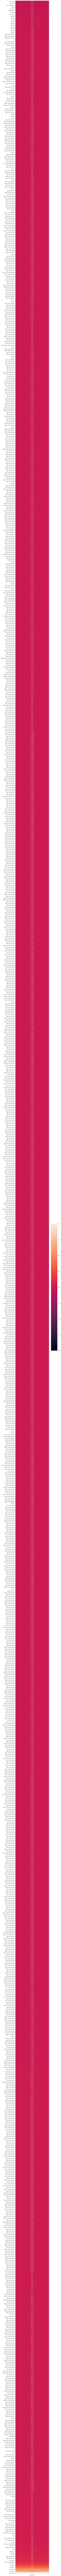

In [110]:
plt.figure(figsize=(8,500))

corr = dummified_1.corr()[['acres_burned']].sort_values('acres_burned') 
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1);
results_path = '../../Viz/acres_burned_dummified_df.png'
#print(results_path)
plt.savefig(results_path);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


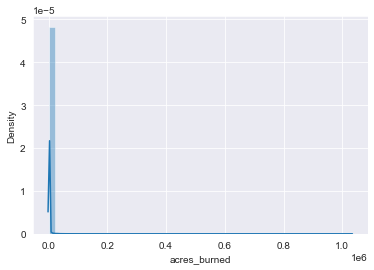

<Figure size 432x288 with 0 Axes>

In [24]:
from scipy import stats 
#histogram and normal probability plot
sns.distplot(df_clean['acres_burned']);
fig = plt.figure()
res = stats.probplot(df_clean['acres_burned'])

column_name  null_count  percent_missing  \
0                           lattitude           0             0.00   
1                           longitude           0             0.00   
2                        acres_burned           0             0.00   
3                        IsFSAssisted           0             0.00   
4                                year           0             0.00   
5                               month           0             0.00   
6                               value           0             0.00   
7                             anomaly           0             0.00   
8                        area (acres)           0             0.00   
9                          population           0             0.00   
10                                 d0           0             0.00   
11                                 d1           0             0.00   
12                                 d2           0             0.00   
13                                 d3           0             0.00   
14                                 d4           0             0.00   
15                           DSCI_avg           0             0.00   
16                        DSCI_summed           0             0.00   
17                  precipitation(in)           0             0.00   
18                   fire_cause_Human           0             0.00   
19                 fire_cause_Natural           0             0.00   
20            fire_cause_Undetermined           0             0.00   
21                 fire_cause_Unknown           0             0.00   
22            origin_county_Abbeville           0             0.00   
23                  origin_county_Ada           0             0.00   
24                origin_county_Adair           0             0.00   
25                origin_county_Adams           0             0.00   
26              origin_county_Addison           0             0.00   
27                origin_county_Aiken           0             0.00   
28               origin_county_Aitkin           0             0.00   
29              origin_county_Alachua           0             0.00   
30              origin_county_Alameda           0             0.00   
31              origin_county_Alamosa           0             0.00   
32               origin_county_Albany           0             0.00   
33            origin_county_Albemarle           0             0.00   
34               origin_county_Alcona           0             0.00   
35               origin_county_Alcorn           0             0.00   
36            origin_county_Alexander           0             0.00   
37              origin_county_Alfalfa           0             0.00   
38                origin_county_Alger           0             0.00   
39            origin_county_Allamakee           0             0.00   
40             origin_county_Allegany           0             0.00   
41            origin_county_Alleghany           0             0.00   
42            origin_county_Allendale           0             0.00   
43               origin_county_Alpine           0             0.00   
44               origin_county_Amador           0             0.00   
45              origin_county_Amherst           0             0.00   
46                origin_county_Amite           0             0.00   
47             origin_county_Anderson           0             0.00   
48         origin_county_Androscoggin           0             0.00   
49             origin_county_Angelina           0             0.00   
50         origin_county_Anne Arundel           0             0.00   
51                origin_county_Anoka           0             0.00   
52                origin_county_Anson           0             0.00   
53             origin_county_Antelope           0             0.00   
54               origin_county_Apache           0             0.00   
55            origin_county_Appanoose           0             0.00   
56              origin_county_Aransa

In [15]:
model_1 = dummified_1.drop(columns='acres_burned')
model_1.sort_values(by=['year','month']).head()

lattitude  longitude  IsFSAssisted  year  month  value  anomaly  \
34889    -116.33      43.41          1.00  2016      4  47.00     6.00   
34890     -94.92      48.02          0.00  2016      4  42.50     1.20   
34891     -95.02      47.88          0.00  2016      4  42.50     1.20   
34892    -112.76      34.20          0.00  2016      4  58.50     1.80   
34893    -108.54      36.74          1.00  2016      4  52.30     0.90   

       area (acres)   population    d0    d1   d2   d3   d4  DSCI_avg  \
34889 53,487,360.00 1,684,036.00  8.04  0.00 0.00 0.00 0.00      8.04   
34890 55,643,520.00 5,525,360.00  9.66  1.03 0.00 0.00 0.00     11.72   
34891 55,643,520.00 5,525,360.00  9.66  1.03 0.00 0.00 0.00     11.72   
34892 72,963,840.00 6,944,767.00 32.78 65.58 1.17 0.00 0.00    167.45   
34893 77,819,520.00 2,092,555.00 53.02 43.69 0.09 0.00 0.00    140.66   

       DSCI_summed  precipitation(in)  fire_cause_Human  fire_cause_Natural  \
34889        24.13               0.04                 1                   0   
34890        35.15               0.04                 0                   0   
34891        35.15               0.04                 0                   0   
34892       502.34               0.03                 0                   0   
34893       421.97               0.24                 1                   0   

       fire_cause_Undetermined  fire_cause_Unknown  origin_county_Abbeville  \
34889                        0                   0                        0   
34890                        1                   0                        0   
34891                        1                   0                        0   
34892                        1                   0                        0   
34893                        0                   0                        0   

       origin_county_Ada  origin_county_Adair  origin_county_Adams  \
34889                  1                    0                    0   
34890                  0                    0                    0   
34891                  0                    0                    0   
34892                  0                    0                    0   
34893                  0                    0                    0   

       origin_county_Addison  origin_county_Aiken  origin_county_Aitkin  \
34889                      0                    0                     0   
34890                      0                    0                     0   
34891                      0                    0                     0   
34892                      0                    0                     0   
34893                      0                    0                     0   

       origin_county_Alachua  origin_county_Alameda  origin_county_Alamosa  \
34889                      0                      0                      0   
34890                      0                      0                      0   
34891                      0                      0                      0   
34892                      0                      0                      0   
34893                      0                      0                      0   

       origin_county_Albany  origin_county_Albemarle  origin_county_Alcona  \
34889                     0                        0                     0   
34890                     0                        0                     0   
34891                     0                        0                     0   
34892                     0                        0                     0   
34893                     0                        0                     0   

       origin_county_Alcorn  origin_county_Alexander  origin_county_Alfalfa  \
34889                     0                        0                      0   
34890                     0                        0                      0   
34891                     0                        0                      0   
34892                     0                    

In [5]:
fire_class = []
for obs in df_clean['acres_burned']:
    if 0<=obs <= 0.26:
        fire_class.append(1)
    elif 0.26 <= obs <10.0:
        fire_class.append(2)
    elif 10.0<=obs<100.0:
        fire_class.append(3)
    elif 100.0<=obs<300:
        fire_class.append(4)
    elif 300.0 <= obs <1_000:
        fire_class.append(5)
    elif 1_000.0<=obs<5000.0:
        fire_class.append(6)
    elif 5000.0 <= obs <10_000:
        fire_class.append(7)
    elif 10_000.0 <=obs<50000:
        fire_class.append(8)
    elif 50000.0<=obs<100_000:
        fire_class.append(9)
    elif 100_000.0<=obs<500000.0:
        fire_class.append(10)
    elif 500000.0 <= obs <1_000_000:
        fire_class.append(11)
    elif obs >= 1_000_000.0:
        fire_class.append(12)
    else:
        print(obs)
df_clean['fire_class'] = fire_class 


#model_1['fire_class'] = fire_class 


<ipython-input-5-b46e203cd545>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fire_class'] = fire_class


In [17]:
mode1_1 = model_1.sort_values(by=['year','month'])

In [18]:
mode1_1['fire_class'].head()

34889    1
34890    1
34891    1
34892    2
34893    2
Name: fire_class, dtype: int64

In [ ]:
#mode1_1.corr()

In [ ]:
#def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(mode1_1, 3))

Top Absolute Correlations


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [22]:
X =mode1_1.drop(columns = 'fire_class') 
y= mode1_1['fire_class']
Xtrain, Xtest, ytrain, ytest = train_test_split(model_1.iloc[:, :500], y, test_size=0.2,shuffle=False)

random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)


In [23]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print('train',round(random_model_accuracy, 2), '%')
random_model_accuracy = round(random_model.score(Xtest, ytest)*100,2)
print('test',round(random_model_accuracy, 2), '%')


train 95.36 %
test 43.02 %
